# cognee - Get Started

## Let's talk about the problem first

###  -  Since LLMs appeared, people have tried to personalize them.
###  -  People do "prompt engineering" and add specific instructions to the LLM
###  - "Become a sales agent" or "Become a programmer"

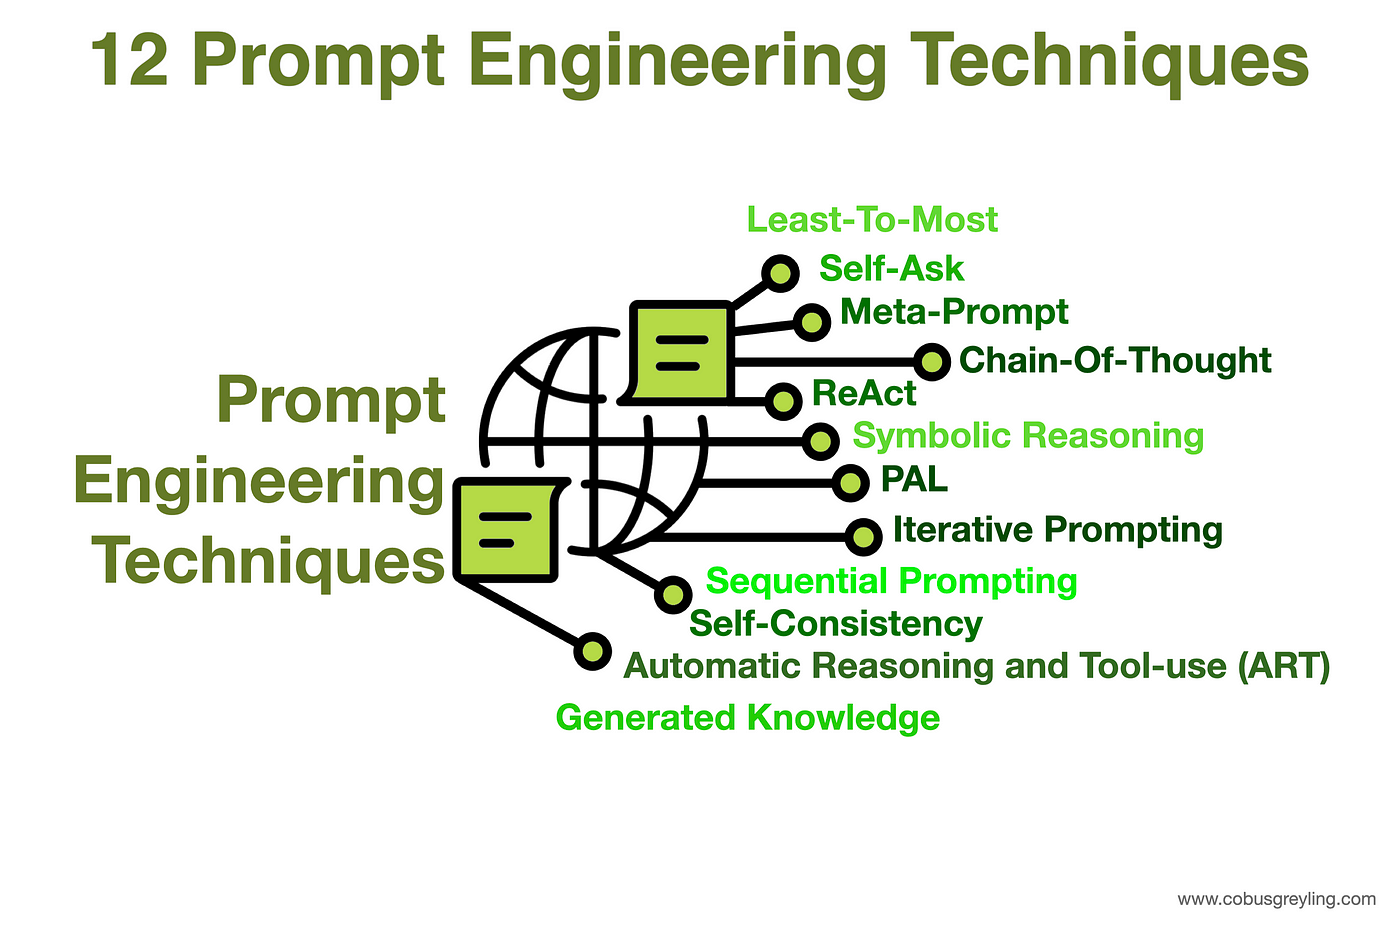

## The next solution was RAGs 

RAGs(Retrieval Augmented Generation) are systems that connect to a vector store and search for similar data so they can enrich LLM response

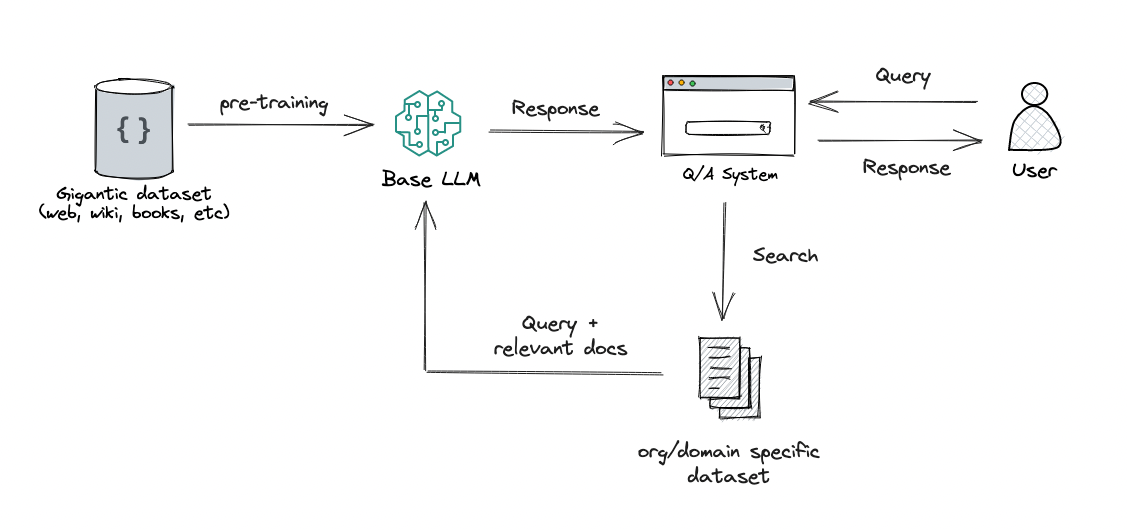


## Semantic similarity search is not magic 
### If you search  for an apple, the closest thing you get is that you don't like apples
### Would it not be nice to have a semantic model LLMs could use


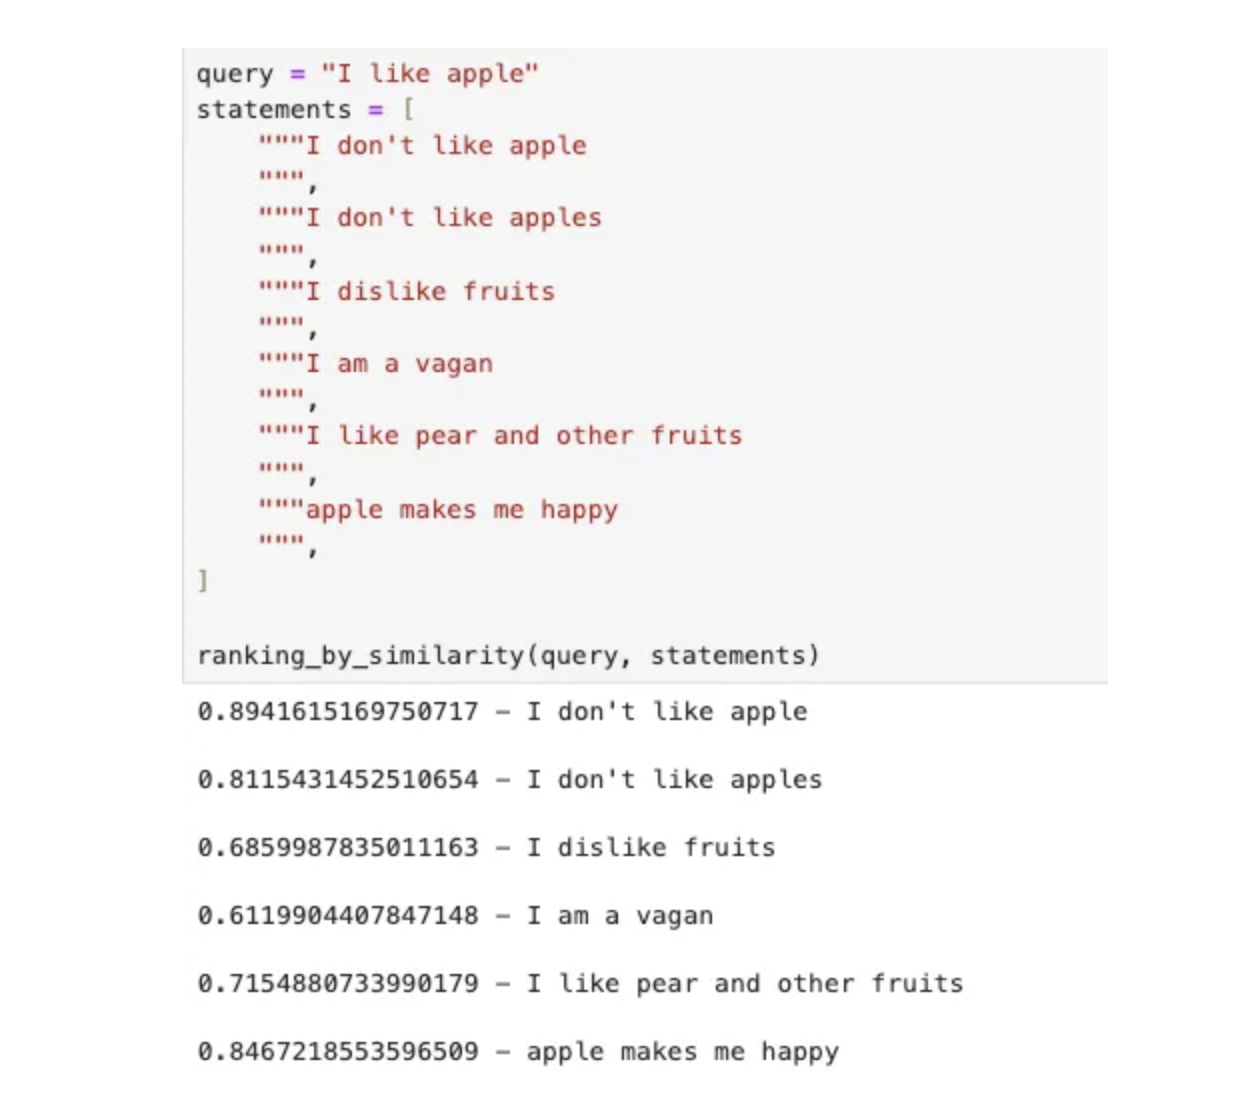

# That is where Cognee comes in

### Our goal is to:
- create a semantic representation of the data 
- split the data into a multilayer graph network containing propositions

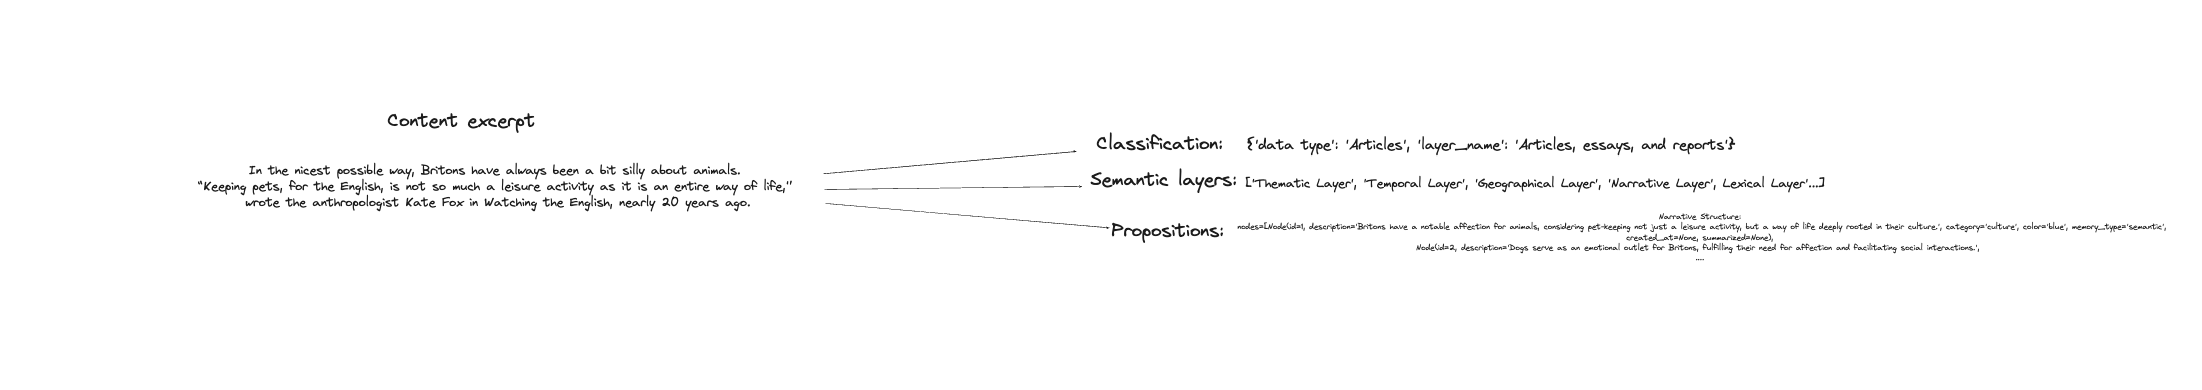

## What is a semantic layer and what are propositions

- Multilayer network is cognitive multilayer networks as a  quantitative and interpretative framework for investigating the mental lexicon. 
- The mental lexicon is a complex cognitive system representing information about the words/concepts that one knows
Article 2


- Propositions are defined as atomic expressions within text, each encapsulating a distinct factoid and presented in a concise, self-contained natural language format.
Article 1

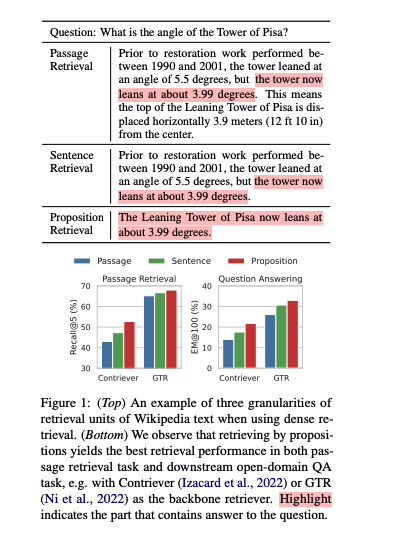 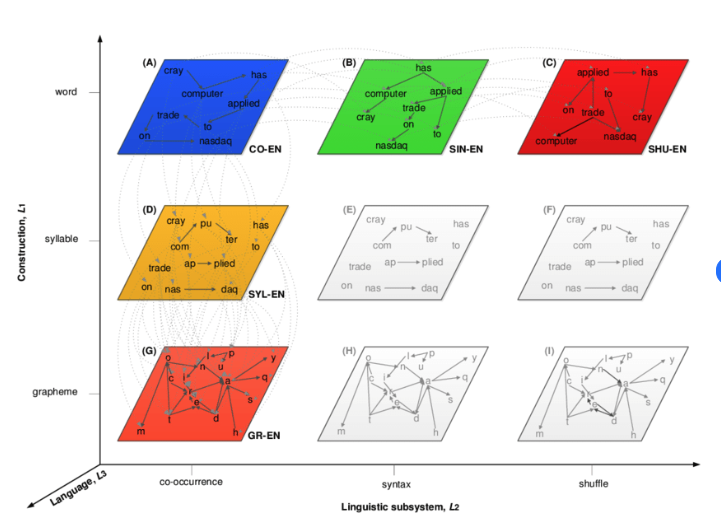

### We combine the concepts of Multilayer networks with the propositions to create a semantic knowledge graph

Relevant articles are: https://arxiv.org/pdf/2312.06648.pdf and   https://link.springer.com/article/10.3758/s13423-024-02473-9

# Demo time

We load the data from a local folder

In [ ]:
from os import listdir, path
from uuid import uuid5, UUID
from cognee import add

data_path = path.abspath(".data")

results = await add(data_path, "izmene")
for result in results:
    print(result)


In [ ]:
import duckdb
from cognee.root_dir import get_absolute_path

dataset_name = "pdf_files"

db_path = get_absolute_path("./data/cognee")
db_location = db_path + "/cognee.duckdb"
print(db_location)

db = duckdb.connect(db_location)

tables = db.sql("SELECT DISTINCT schema_name FROM duckdb_tables();").df()
print(list(filter(lambda table_name: table_name.endswith('staging') is False, tables.to_dict()["schema_name"].values())))

izmene = db.sql(f"SELECT id FROM izmene.file_metadata;")
print(izmene)

# pravilnik = db.sql(f"SELECT * FROM pravilnik.file_metadata;")

# print(pravilnik)




In [ ]:
from os import path, listdir
from cognee import cognify, list_datasets
from cognee.utils import render_graph
from cognee.infrastructure import infrastructure_config

vector_engine = infrastructure_config.get_config()["vector_engine"] 

await vector_engine.prune()

print(list_datasets())

graph = await cognify()

graph_url = await render_graph(graph, graph_type = "networkx")
print(graph_url)


In [ ]:
from cognee import search
from cognee.api.v1.search.search import SearchType

query_params = {
    SearchType.SIMILARITY: {'query': 'Ministarstvo'}
}

results = await search(graph, query_params)

for result in results[0]:
    print(result)

# Some common questions

- This tool is not a replacement for vector databases or Langchain, it's an extension 
- We want to help map the old data world to the new one
- Local models and evals are on the roadmap
- The relationships in the graph are customizable, so is the graph model. It is something we will continue exploring

# Give us a star if you like it!
https://github.com/topoteretes/cognee

In [ ]:
from qdrant_client import models, QdrantClient
import os
qdrant = QdrantClient(
                url = os.getenv('QDRANT_URL'),
                api_key = os.getenv('QDRANT_API_KEY'))

collections_response = qdrant.http.collections_api.get_collections()
collections = collections_response.result.collections

# Delete each collection
for collection in collections:
    collection_name = collection.name
    print(f"Deleting collection: {collection_name}")
    delete_response = qdrant.http.collections_api.delete_collection(collection_name=collection_name)
    if delete_response.status == "ok":
        print(f"Collection '{collection_name}' deleted successfully.")
    else:
        print(f"Failed to delete collection '{collection_name}'. Response: {delete_response}")

print("All collections have been deleted.")